In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif

In [6]:
df = pd.read_csv('adult_with_headers.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# Replace "?" with NaN and drop or impute
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [11]:
# Convert target variable to binary
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [13]:
# Separate numerical and categorical features
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include='object').columns.tolist()
if 'income' in categorical:
    categorical.remove('income')

In [14]:
# Scaling
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df_std_scaled = df.copy()
df_minmax_scaled = df.copy()

df_std_scaled[numerical] = scaler_std.fit_transform(df[numerical])
df_minmax_scaled[numerical] = scaler_minmax.fit_transform(df[numerical])

print("\nStandard Scaled Data (head):")
print(df_std_scaled[numerical].head())


Standard Scaled Data (head):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week    income  
0       -0.035429 -0.563199  
1       -2.222153 -0.563199  
2       -0.035429 -0.563199  
3       -0.035429 -0.563199  
4       -0.035429 -0.563199  


In [15]:
print("\nMin-Max Scaled Data (head):")
print(df_minmax_scaled[numerical].head())


Min-Max Scaled Data (head):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  income  
0        0.397959     0.0  
1        0.122449     0.0  
2        0.397959     0.0  
3        0.397959     0.0  
4        0.397959     0.0  


In [16]:
# Encoding
df_encoded = df.copy()
for col in categorical:
    if df[col].nunique() <= 5:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
    else:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nEncoded Data (head):")
print(df_encoded.head())


Encoded Data (head):
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1          2174             0              40   
1           4             0             0             0              13   
2           6             1             0             0              40   
3           6             0             0             0              40   
4          10             5             0             0              40   

   native_country  income  race_ Asian-Pac-Islander  race_ Black  race_ Other  \
0              39  

In [19]:
# Feature Engineering
# 1. Create 'capital_diff' as capital-gain - capital-loss
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

In [21]:
# 2. Create 'hours_per_week_category'
df_encoded['hours_category'] = pd.cut(df_encoded['hours_per_week'],bins=[0, 20, 40, 60, 100],labels=['low', 'medium', 'high', 'very high'])

df_encoded = pd.get_dummies(df_encoded, columns=['hours_category'], drop_first=True)

In [23]:
# Log transform skewed feature: 'education-num' (for demo; choose skewed feature in your data)
df_encoded['log_education'] = np.log1p(df_encoded['education_num'])

In [24]:
# Outlier Detection and Removal using Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_encoded[numerical])

df_cleaned = df_encoded[outliers == 1]

print(f"\nData shape after removing outliers: {df_cleaned.shape}")


Data shape after removing outliers: (32235, 23)


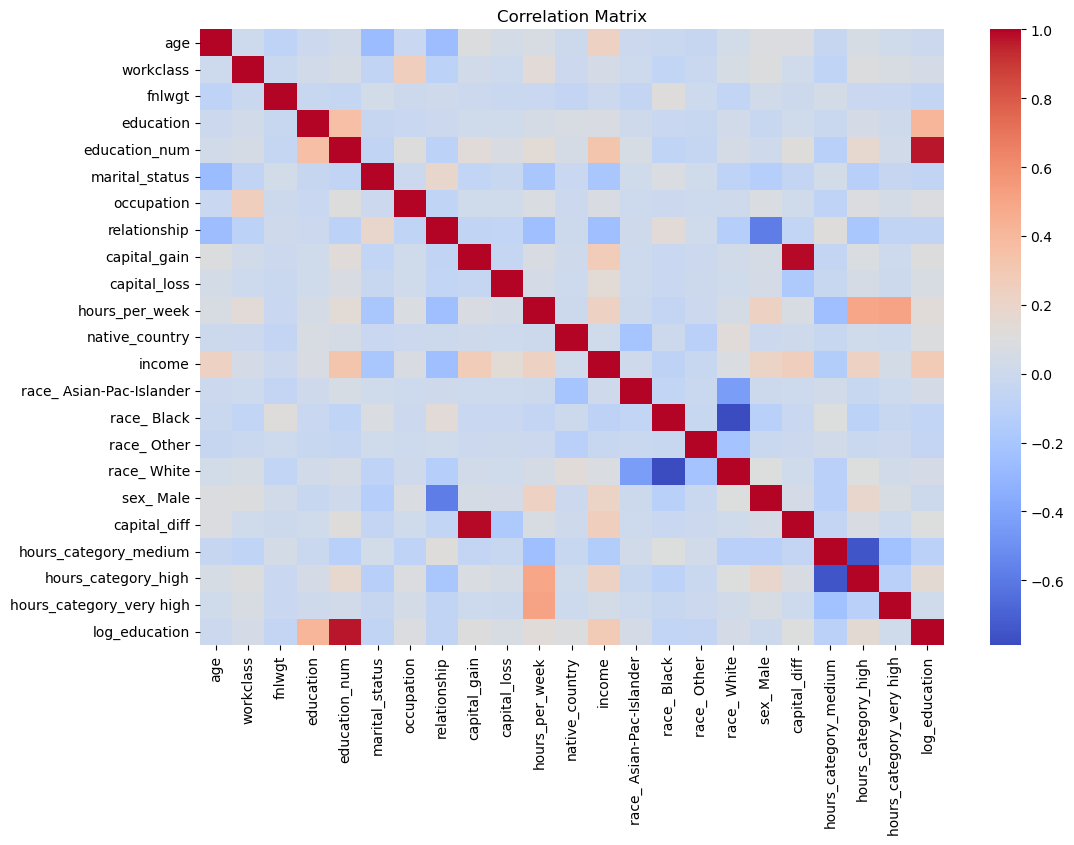

In [25]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [26]:
# Mutual Information (alternative to PPS)
X = df_cleaned.drop('income', axis=1)
y = df_cleaned['income']
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("\nTop features based on Mutual Information:")
print(mi_df.head(10))


Top features based on Mutual Information:
           Feature  MI Score
7     relationship  0.117542
17    capital_diff  0.109290
5   marital_status  0.108791
8     capital_gain  0.078531
0              age  0.066824
3        education  0.063031
6       occupation  0.062498
4    education_num  0.061683
21   log_education  0.060474
10  hours_per_week  0.042778
